# 1. Import and Install Dependencies

In [2]:
%pip install tensorflow-gpu opencv-python mediapipe scikit-learn matplotlib wandb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_req

In [1]:
import tensorflow as tf

print(tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the following GPUs:")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow is not using any GPUs.")



2.16.1
TensorFlow is not using any GPUs.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [10]:
draw_landmarks(frame, results)
print(results.face_landmarks)

landmark {
  x: 0.389370859
  y: 0.423186362
  z: -0.0222944692
}
landmark {
  x: 0.379255563
  y: 0.387370527
  z: -0.0401077345
}
landmark {
  x: 0.387697101
  y: 0.398198128
  z: -0.0207082964
}
landmark {
  x: 0.376727521
  y: 0.352226138
  z: -0.0272506513
}
landmark {
  x: 0.378063291
  y: 0.376393259
  z: -0.0426856875
}
landmark {
  x: 0.379729748
  y: 0.362275332
  z: -0.039594207
}
landmark {
  x: 0.386748284
  y: 0.32698071
  z: -0.0197228175
}
landmark {
  x: 0.344223171
  y: 0.32390672
  z: 0.0311330296
}
landmark {
  x: 0.388106793
  y: 0.298462898
  z: -0.0150673948
}
landmark {
  x: 0.387032211
  y: 0.283113778
  z: -0.0169528611
}
landmark {
  x: 0.38823083
  y: 0.22372824
  z: -0.00935912691
}
landmark {
  x: 0.390147328
  y: 0.428477317
  z: -0.0214337762
}
landmark {
  x: 0.391608447
  y: 0.432883739
  z: -0.0188153945
}
landmark {
  x: 0.393297672
  y: 0.435025871
  z: -0.0153743
}
landmark {
  x: 0.393628687
  y: 0.439468324
  z: -0.0128913727
}
landmark {
  x: 0.

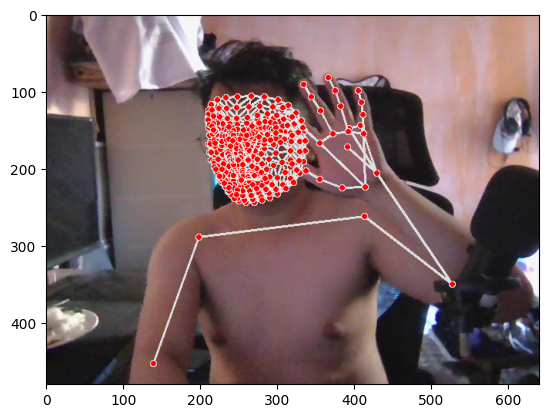

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)
print(results.pose_landmarks)

landmark {
  x: 0.409807593
  y: 0.395763487
  z: -0.546907783
  visibility: 0.999971867
}
landmark {
  x: 0.432391554
  y: 0.331519812
  z: -0.527692258
  visibility: 0.999942541
}
landmark {
  x: 0.449703604
  y: 0.326567352
  z: -0.527173638
  visibility: 0.999940574
}
landmark {
  x: 0.466313541
  y: 0.321581811
  z: -0.527031839
  visibility: 0.999936283
}
landmark {
  x: 0.392855257
  y: 0.337895274
  z: -0.502922416
  visibility: 0.999932647
}
landmark {
  x: 0.381816804
  y: 0.338319093
  z: -0.502251685
  visibility: 0.999915719
}
landmark {
  x: 0.371695101
  y: 0.33853358
  z: -0.502450824
  visibility: 0.999915123
}
landmark {
  x: 0.499377728
  y: 0.327927619
  z: -0.297257245
  visibility: 0.999951601
}
landmark {
  x: 0.378885597
  y: 0.343417197
  z: -0.171843365
  visibility: 0.999959111
}
landmark {
  x: 0.444565833
  y: 0.444453299
  z: -0.457479715
  visibility: 0.999973357
}
landmark {
  x: 0.396588147
  y: 0.449263573
  z: -0.420279205
  visibility: 0.999971628
}


In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)
print(result_test)

[ 0.40980759  0.39576349 -0.54690778 ...  0.          0.
  0.        ]


In [18]:
print(result_test)

[ 0.40980759  0.39576349 -0.54690778 ...  0.          0.
  0.        ]


In [19]:
np.save('0', result_test)

In [20]:
np.load('../Data//hello//10//0.npy')

array([ 0.66775966,  0.59646714, -0.58320916, ...,  0.3797726 ,
        0.36501831, -0.02595169])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../Data') 



# Thirty videos worth of data
no_sequences = 121

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [22]:
# Actions that we try to detect
# actions = np.array([ 'hello', 'idle'])
actions = np.array([
    'hello', 'thanks', 'iloveyou', 'idle',
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O',
    'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y',
    'Z',
    ])

print(len(actions))

30


In [23]:
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    dirmax = np.max([0] + [int(d) for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap.release()
cv2.destroyAllWindows()

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'idle': 3,
 'A': 4,
 'B': 5,
 'C': 6,
 'D': 7,
 'E': 8,
 'F': 9,
 'G': 10,
 'H': 11,
 'I': 12,
 'J': 13,
 'K': 14,
 'L': 15,
 'M': 16,
 'N': 17,
 'O': 18,
 'P': 19,
 'Q': 20,
 'R': 21,
 'S': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'X': 27,
 'Y': 28,
 'Z': 29}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
np.array(sequences).shape

(2700, 30, 1662)

In [ ]:
np.array(labels).shape

(2700,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(2700, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y) 

#increase test size to round off test per gesture (28.5/1.5 = 27/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 


In [ ]:
# Initial Split (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y) 

# Split Training Data (80% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, stratify=y_train)  


# X_train, y_train for training
# X_val, y_val for validation during training
# X_test, y_test for final model evaluation



In [ ]:
y_test.shape

(270, 30)

# 7. Build and Train LSTM Neural Network

In [ ]:
import os
import wandb
from wandb.keras import WandbCallback
from keras.callbacks import TensorBoard, Callback
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import BatchNormalization

import numpy as np

ModuleNotFoundError: No module named 'wandb.keras'

In [ ]:
log_dir = os.path.join('Logs')

class IterationCallback(Callback):
    def __init__(self, num_samples_per_gesture=120, smoothing_window=10):
        self.num_samples_per_gesture = num_samples_per_gesture
        self.smoothing_window = smoothing_window
        self.sample_metrics = {}  # Store metrics per gesture
        self.current_gesture_index = 0

    def on_epoch_end(self, epoch, logs=None):
        # Log per-gesture accuracy at the end of each epoch
        y_pred = self.model.predict(X_train)  # Predictions on the training set
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_train, axis=1)

        per_gesture_acc = {}
        for gesture_idx in range(31):
            gesture_mask = (y_true_classes == gesture_idx)
            gesture_acc = np.mean(y_pred_classes[gesture_mask] == y_true_classes[gesture_mask])
            per_gesture_acc[f"gesture_{gesture_idx}_acc"] = gesture_acc

        total_correct = np.sum(y_pred_classes == y_true_classes)
        total_samples = len(y_true_classes)
        overall_accuracy = total_correct / total_samples

        # Log to WandB
        wandb.log({
            "overall_accuracy": overall_accuracy,
            **per_gesture_acc  # Log per-gesture accuracy as well
        })

# Combine Callbacks
callbacks = [
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    WandbCallback(monitor='val_loss', save_model=False),
    IterationCallback()
]

model.fit(X_train, y_train, epochs=wandb.config['epochs'], callbacks=callbacks,
          validation_data=(X_val, y_val))

NameError: name 'Callback' is not defined

In [ ]:
os.environ["DEEP_SIGN"] = "model_training.ipynb"
wandb.init(project="deep-sign")
wandb.config = {
    "model_type": "Conv1D-LSTM",
    "input_shape": (30, 1662),  
    "conv_layers": [
        {"filters": 32, "kernel_size": 3, "activation": "relu"}
    ],
    "lstm_layers": [
        {"units": 64, "return_sequences": True, "activation": "relu"},
        {"units": 128, "return_sequences": True, "activation": "relu"},
        {"units": 64, "return_sequences": False, "activation": "relu"}
    ],
    "dense_layers": [
        {"units": 64, "activation": "relu"},
        {"units": 32, "activation": "relu"}
    ],
    "output_units": actions.shape[0],
    "optimizer": "Adam",
    "loss": "categorical_crossentropy",
    "batch_normalization": True,
    "epochs": 2000
}

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
from keras.layers import Conv1D

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(BatchNormalization()) 

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=False, activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization()) 

model.add(Dense(32, activation='relu'))

model.add(Dense(actions.shape[0], activation='softmax')) 

c:\Users\zimmer\anaconda3\envs\deepsign\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=wandb.config['epochs'], callbacks=callbacks,
          validation_data=(X_val, y_val))
wandb.save(os.path.join(log_dir, '*'))

Epoch 1/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - categorical_accuracy: 0.0451 - loss: 3.4462
Epoch 2/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - categorical_accuracy: 0.0900 - loss: 3.1877
Epoch 3/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.1219 - loss: 3.0018
Epoch 4/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - categorical_accuracy: 0.1850 - loss: 2.7738
Epoch 5/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - categorical_accuracy: 0.1985 - loss: 2.6650
Epoch 6/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.2259 - loss: 2.5118
Epoch 7/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - categorical_accuracy: 0.2092 - loss: 2.6206
Epoch 8/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - categorical_accuracy: 0.1366 - loss: 2.8422
Epoch 9/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - categorical_accuracy: 0.1879 - loss: 2.5487
Epoch 10/2000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.2230 - loss: 2.4252
Epoch 11

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

In [ ]:
import wandb
import scikitplot as skplt
import matplotlib.pyplot as plt

# ... (after model training)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
skplt.metrics.plot_confusion_matrix(y_true_classes, y_pred_classes, ax=ax, normalize='true')  # Normalize for percentages
wandb.log({"confusion_matrix": wandb.Image(fig)})


ModuleNotFoundError: No module named 'scikitplot'

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


In [ ]:
actions[np.argmax(res[2])]

'hello'

In [ ]:
actions[np.argmax(y_test[1])]

'S'

# 9. Save Weights

In [ ]:
model.save('../models/deepsign_chan-v3.3.keras')

In [ ]:
del model

In [ ]:
model.load_weights('../models/deepsign_chan-v3.3.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'y_test' is not defined

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [ ]:
accuracy_score(ytrue, yhat)

0.5555555555555556

In [ ]:
from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [ ]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[13] [13]
J 0.996858
['J']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13] [13]
J 0.99686277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13] [13]
J 0.995031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[13, 13, 13, 13] [13]
J 0.99764305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13] [13]
J 0.99392635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13] [13]
J 0.99653256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13] [13]
J 0.9933508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99480575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99169344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9966376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9975157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9982486
1/1 ━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │       159,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 28, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021,916 (3.90 MB)

 Trainable params: 340,446 (1.30 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 680,894 (2.60 MB)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
# colors = [(245,117,16), (117,245,16)]
colors = [
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), (16,117,245), (245,117,16),
    (245,117,16), (117,245,16), 
    ]

In [ ]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, 
              (0, 60 + num * 40), 
              (int(np.round(prob * 900)), 90 + num * 40), # Use np.round
              colors[num], -1) 
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # print(predictions)
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            print(predictions[-10:], np.unique(predictions[-10:]))
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                print(actions[np.argmax(res)], res[np.argmax(res)])
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                           
                    else:
                        sentence.append(actions[np.argmax(res)])
                        print(sentence)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
[13] [13]
J 0.996858
['J']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13] [13]
J 0.99686277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13] [13]
J 0.995031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[13, 13, 13, 13] [13]
J 0.99764305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13] [13]
J 0.99392635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13] [13]
J 0.99653256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13] [13]
J 0.9933508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99480575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.99169344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9966376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9975157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13] [13]
J 0.9982486
1/1 ━━━━━━━━━━━━━